# `matplotlib` moving grid to the bottom

## Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager
import numpy as np

## Settings

In [2]:
# Add system font so matplotlib sees them
for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    font_manager.fontManager.addfont(font)

In [3]:
rcParams['font.family'] = 'Roboto'  # You need to have `Roboto` font installed on you computer
rcParams['font.size'] = 16

## Data

In [4]:

y1 = np.random.randint(2, 8, size=6)
y2 = np.linspace(1, 10, 50) + np.random.randn(50)*np.random.choice([-1, 1], 50)


## Plot

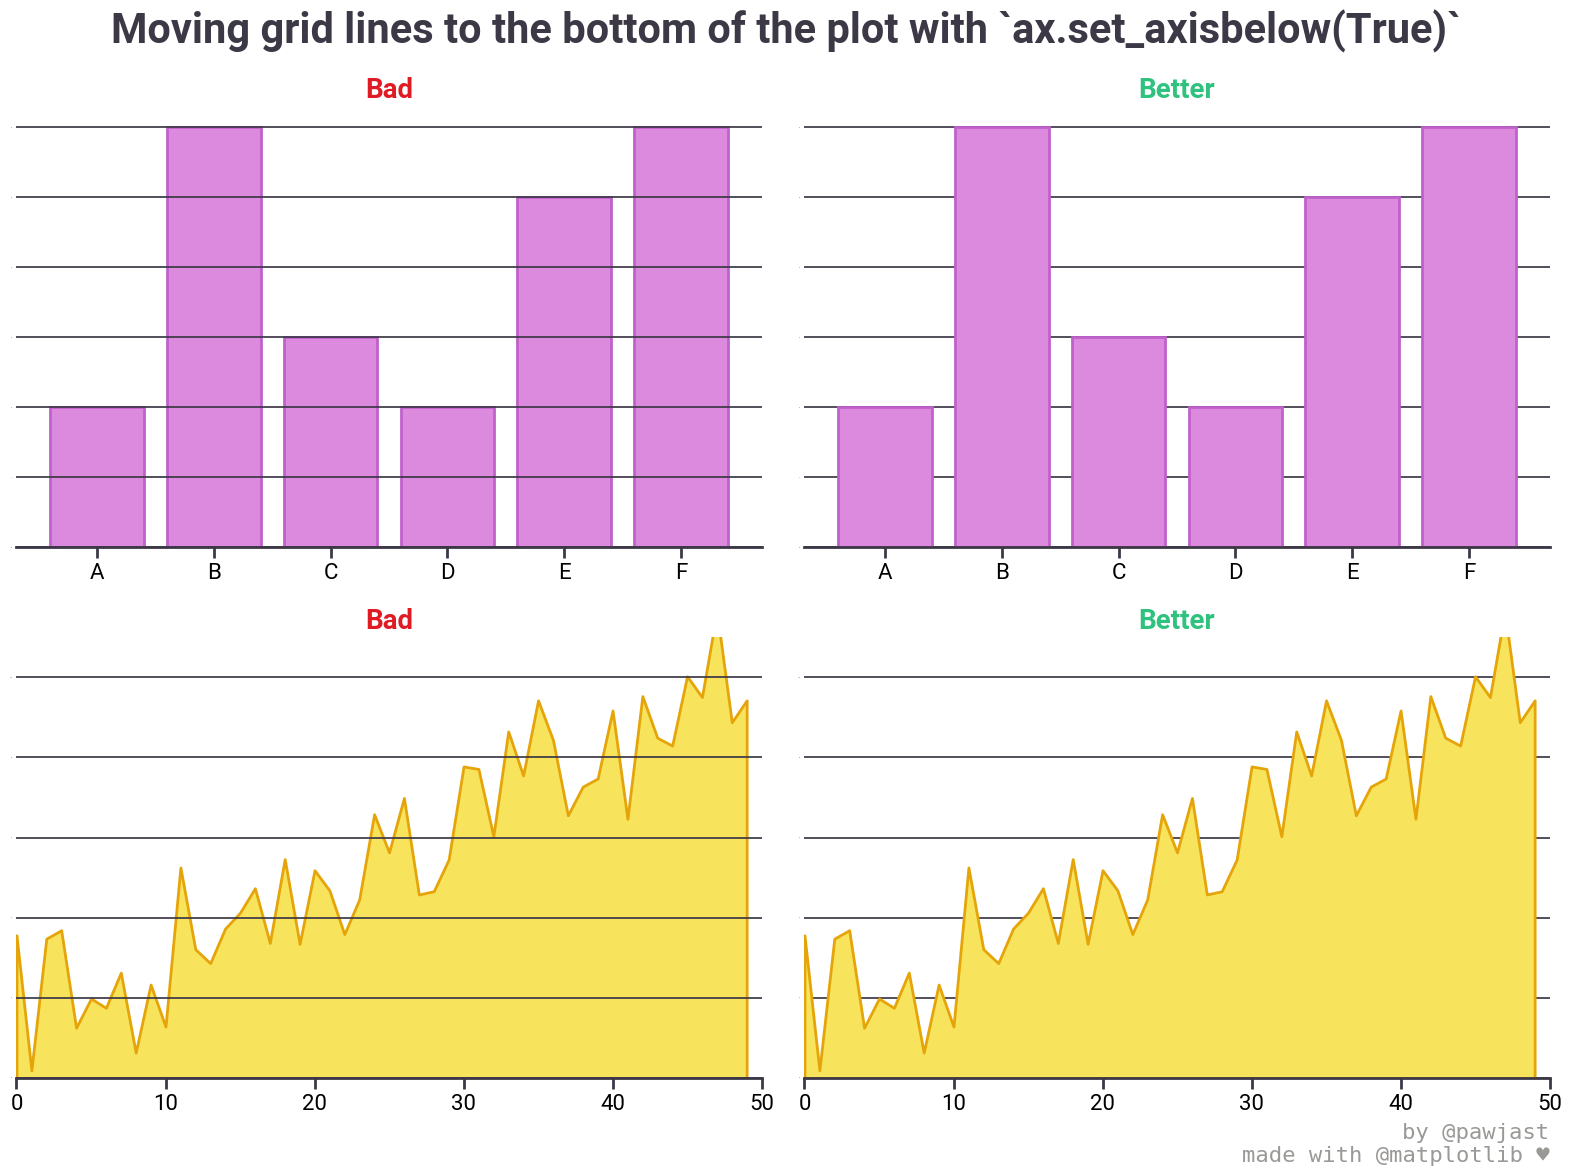

In [5]:
my_colour = "#3d3846"

mosaic = """
    AB
    CD
"""

fig, axs = plt.subplot_mosaic(
    mosaic=mosaic,
    figsize=(16,12),
    facecolor="white"
)
fig.suptitle(
    "Moving grid lines to the bottom of the plot with `ax.set_axisbelow(True)`",
    fontsize=30,
    weight="bold",
    color=my_colour
)

# ADD GRID and GLOBAL SETTINGS
for ax in axs:
    # Grid
    axs[ax].grid(
        which="major",
        axis="y",
        lw=1.25,
        color=my_colour
    )
    if ax in list("BD"):
        axs[ax].set_axisbelow(True)
        axs[ax].set_title(
            "Better",
            fontsize=20,
            weight="bold",
            color="#2ec27e"
        )
    else:
        axs[ax].set_title(
            "Bad",
            fontsize=20,
            weight="bold",
            color="#e01b24"
        )

    # Remove spines
    for position in ["left", "top", "right"]:
        axs[ax].spines[position].set_visible(False)

    # Update bottom spine apperance
    axs[ax].spines["bottom"].set_color(my_colour)
    axs[ax].spines["bottom"].set_linewidth(2)

    # Remove y ticks and labels
    axs[ax].tick_params(
        axis="y",
        length=0,
        labelsize=0
    )
    # Update x ticks and labels appearance
    axs[ax].tick_params(
        axis="x",
        length=8,
        width=2,
        color=my_colour
    )

# PLOT BARS
for ax in list("AB"):
    axs[ax].bar(
        list("ABCDEF"),
        y1,
        edgecolor="#c061cb",
        facecolor="#dc8add",
        lw=2
    )

# PLOT FILL_BETWEEN
for ax in list("CD"):
    axs[ax].fill_between(
        x=range(len(y2)),
        y1=0,
        y2=y2,
        edgecolor="#e5a50a",
        facecolor="#f8e45c",
        lw=2
    )

    axs[ax].set_xlim(0, 50)
    axs[ax].set_ylim(0, 11)

# Footer
axs["D"].text(
    1, -.2,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = axs["D"].transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
)

plt.tight_layout()

# plt.savefig(
#     fname="pawjast.png",
#     format="png",
#     dpi=125
# );